In [174]:
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.metrics.pairwise import manhattan_distances 
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [175]:
df = pd.read_csv("C:/Users/Paolo/Documents/Bioinformatics Research/Khomtchouk Lab/Aachen University/MA_VC_Study/MIMIC_III_VC.csv")

In [176]:
df = df.dropna()

In [177]:
df['anion_gap'] = df['sodium'] - (df['chloride'] + df['bicarbonate'])

In [178]:
df['MA'] = df['anion_gap']>12

In [179]:
df.drop(['SUBJECT_ID','VC','MA'],axis=1)

,pH,lactate,bicarbonate,base_excess,pCO2,sodium,chloride,anion_gap
0,7.39,1.8,23.0,-1.0,33.0,141.0,109.0,9.0
1,7.31,3.9,25.0,-5.0,27.0,139.0,102.0,12.0
2,7.41,1.9,30.0,0.0,38.0,137.0,100.0,7.0
3,7.39,1.0,16.0,0.0,44.0,135.0,107.0,12.0
4,7.52,1.5,25.0,2.0,30.0,138.0,104.0,9.0
...,...,...,...,...,...,...,...,...
24887,7.34,1.6,27.0,3.0,57.0,139.0,100.0,12.0
24888,7.35,1.1,29.0,-1.0,43.0,135.0,99.0,7.0
24889,7.43,0.8,29.0,0.0,36.0,137.0,103.0,5.0
24890,7.36,1.9,31.0,-1.0,41.0,141.0,101.0,9.0


In [142]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['SUBJECT_ID','VC','MA'],axis=1))

In [86]:
dissimilarities = manhattan_distances(df_scaled)

In [87]:
dissimilarities.shape

(24856, 24856)

In [88]:
embedding = UMAP(n_components=2, metric='manhattan', random_state=30).fit_transform(df_scaled)

C:\Users\Paolo\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


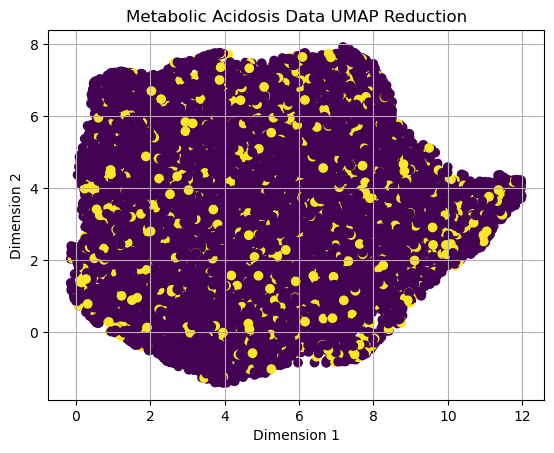

In [89]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=df['VC'])
plt.title('Vascular Calcification Data UMAP Reduction')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

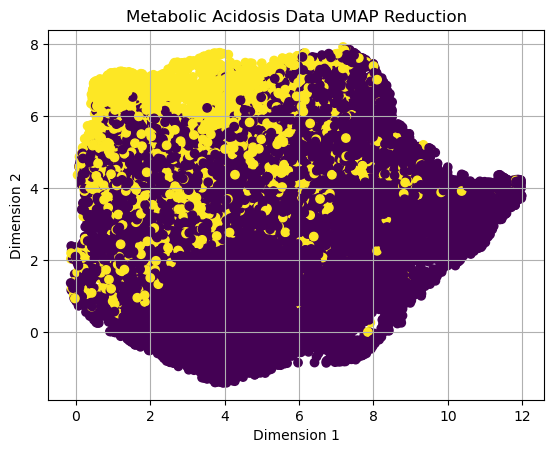

In [92]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=df['MA'])
plt.title('Metabolic Acidosis Data UMAP Reduction')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

In [93]:
#df.to_csv('MIMIC_III_VC_2.csv', index=False)

In [143]:
VC_MA = pd.DataFrame({'VC': df['VC'], 'MA': df['MA']})
VC_MA['MA'] = VC_MA['MA'].map({True: 'MA', False: 'No MA'})
VC_MA['VC'] = VC_MA['VC'].map({True: 'VC', False: 'No VC'})

In [144]:
VC_MA

,VC,MA
0,VC,No MA
1,No VC,No MA
2,No VC,No MA
3,No VC,No MA
4,No VC,No MA
...,...,...
24887,No VC,No MA
24888,No VC,No MA
24889,No VC,No MA
24890,No VC,No MA


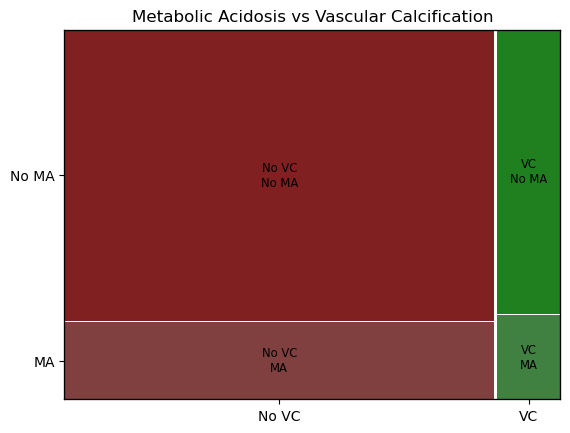

In [145]:
mosaic(pd.crosstab(VC_MA['VC'],VC_MA['MA']).stack(),title='Metabolic Acidosis vs Vascular Calcification')
plt.show()

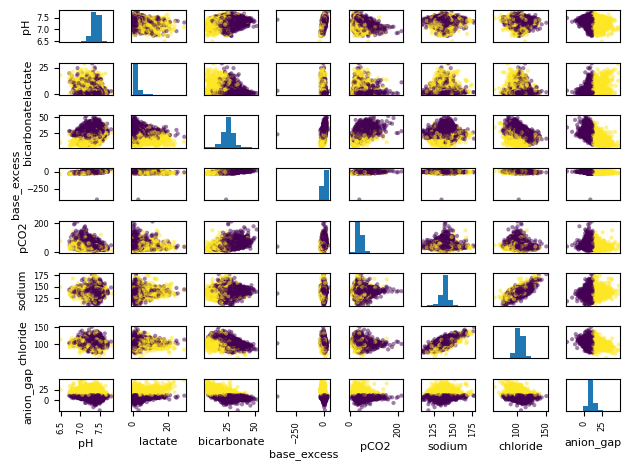

In [157]:
axes = pd.plotting.scatter_matrix(df.drop(['SUBJECT_ID','VC','MA'],axis=1),c=df['MA'])
for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='both', labelsize=6)
plt.tight_layout()
plt.show()

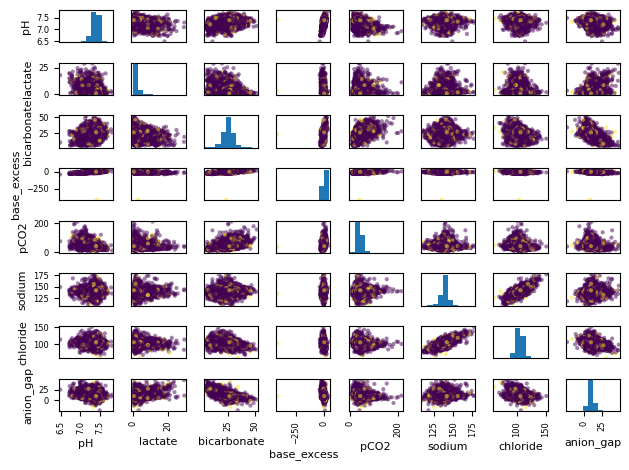

In [158]:
axes = pd.plotting.scatter_matrix(df.drop(['SUBJECT_ID','VC','MA'],axis=1),c=df['VC'])
for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='both', labelsize=6)
plt.tight_layout()
plt.show()

In [168]:
model = LogisticRegression()
model.fit(df.drop(['SUBJECT_ID','VC','MA'],axis=1), df['VC'])

LogisticRegression()

In [171]:
y_pred = model.predict(df.drop(['SUBJECT_ID','VC','MA'],axis=1))
print("Accuracy:", accuracy_score(df['VC'], y_pred))
print("\nClassification Report:\n", classification_report(df['VC'], y_pred))

Accuracy: 0.8705745091728355

Classification Report:
               precision    recall  f1-score   support

       False       0.87      1.00      0.93     21639
        True       0.00      0.00      0.00      3217

    accuracy                           0.87     24856
   macro avg       0.44      0.50      0.47     24856
weighted avg       0.76      0.87      0.81     24856



C:\Users\Paolo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Paolo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Paolo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [180]:
confusion_matrix(df['VC'], y_pred)

array([[21639,     0],
       [ 3217,     0]], dtype=int64)